In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import json

In [10]:
sentences = ['I love my dog', 'I love my cat','you love my dog!']
tokenizer = Tokenizer(num_words = 100, oov_token = "<oov>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<oov>': 1, 'love': 2, 'my': 3, 'i': 4, 'dog': 5, 'cat': 6, 'you': 7}


In [3]:

sentences.append('Do you think my dog is amazing?')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
print(word_index)
print(sequences)

{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [5]:
padded = pad_sequences(sequences)
print(padded)

[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [8]:
import json 
with open('sarcasm.json','r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [10]:
tokenizer = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding = 'post')

print(sentences[0])
print(padded[0])
print(padded.shape)

former versace store clerk sues over secret 'black code' for minority shoppers
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [11]:
# Week 1 

In [12]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

  
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
# Convert it to a Python list and paste it here
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


--2020-06-27 18:30:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.167.16, 172.217.160.240, 216.58.200.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.167.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: '/tmp/bbc-text.csv'

     0K .......... .......... .......... .......... ..........  1%  378K 13s
    50K .......... .......... .......... .......... ..........  2% 3.38M 7s
   100K .......... .......... .......... .......... ..........  3% 3.30M 5s
   150K .......... .......... .......... .......... ..........  4% 3.19M 4s
   200K .......... .......... .......... .......... ..........  5% 2.46M 4s
   250K .......... .......... .......... .......... ..........  6% 2.80M 3s
   300K .......... .......... .......... .......... ..........  7% 3.17M 3s
   350K .......... .......

In [13]:
sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)


print(len(sentences))
print(sentences[0])

#Expected output
# 2225
# tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels. although us leads technology moment also concern raised europe particularly growing uptake services like sky+. happens today will see nine months years time uk adam hume bbc broadcast s futurologist told bbc news website. likes bbc no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters brand loyalty important everyone. will talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest. reality broadband connections anybody can producer content. added: challenge now hard promote programme much choice. means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers. means networks us terms channels take leaf google s book search engine future instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands mr hanlon suggested. end kids just diapers pushing buttons already - everything possible available said mr hanlon. ultimately consumer will tell market want. 50 000 new gadgets technologies showcased ces many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies directtv even launched branded dvr show 100-hours recording capability instant replay search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo called tivotogo means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want want.

2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

In [14]:
tokenizer = Tokenizer(oov_token = "<oov>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))
# Expected output
# 29714

29714


In [15]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

# Expected output
# [  96  176 1158 ...    0    0    0]
# (2225, 2442)

[  96  176 1158 ...    0    0    0]
(2225, 2442)


In [16]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)


print(label_seq)
print(label_word_index)

# Expected Output
# [[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2], [1], [2], [1], [4], [5], [2], [3], [3], [5], [1], [5], [3], [1], [5], [1], [1], [5], [1], [3], [3], [5], [4], [1], [3], [2], [5], [4], [1], [4], [1], [5], [3], [1], [5], [4], [2], [4], [2], [2], [4], [2], [1], [2], [1], [2], [1], [5], [2], [2], [5], [1], [1], [3], [4], [3], [3], [3], [4], [1], [4], [3], [2], [4], [5], [4], [1], [1], [2], [2], [3], [2], [4], [1], [5], [1], [3], [4], [5], [2], [1], [5], [1], [4], [3], [4], [2], [2], [3], [3], [1], [2], [4], [5], [3], [4], [2], [5], [1], [5], [1], [5], [3], [2], [1], [2], [1], [1], [5], [1], [3], [3], [2], [5], [4], [2], [1], [2], [5], [2], [2], [2], [3], [2], [3], [5], [5], [2], [1], [2], [3], [2], [4], [5], [2], [1], [1], [5], [2], [2], [3], [4], [5], [4], [3], [2], [1], [3], [2], [5], [4], [5], [4], [3], [1], [5], [2], [3], [2], [2], [3], [1], [4], [2], [2], [5], [5], [4], [1], [2], [5], [4], [4], [5], [5], [5], [3], [1], [3], [4], [2], [5], [3], [2], [5], [3], [3], [1], [1], [2], [3], [5], [2], [1], [2], [2], [1], [2], [3], [3], [3], [1], [4], [4], [2], [4], [1], [5], [2], [3], [2], [5], [2], [3], [5], [3], [2], [4], [2], [1], [1], [2], [1], [1], [5], [1], [1], [1], [4], [2], [2], [2], [3], [1], [1], [2], [4], [2], [3], [1], [3], [4], [2], [1], [5], [2], [3], [4], [2], [1], [2], [3], [2], [2], [1], [5], [4], [3], [4], [2], [1], [2], [5], [4], [4], [2], [1], [1], [5], [3], [3], [3], [1], [3], [4], [4], [5], [3], [4], [5], [2], [1], [1], [4], [2], [1], [1], [3], [1], [1], [2], [1], [5], [4], [3], [1], [3], [4], [2], [2], [2], [4], [2], [2], [1], [1], [1], [1], [2], [4], [5], [1], [1], [4], [2], [4], [5], [3], [1], [2], [3], [2], [4], [4], [3], [4], [2], [1], [2], [5], [1], [3], [5], [1], [1], [3], [4], [5], [4], [1], [3], [2], [5], [3], [2], [5], [1], [1], [4], [3], [5], [3], [5], [3], [4], [3], [5], [1], [2], [1], [5], [1], [5], [4], [2], [1], [3], [5], [3], [5], [5], [5], [3], [5], [4], [3], [4], [4], [1], [1], [4], [4], [1], [5], [5], [1], [4], [5], [1], [1], [4], [2], [3], [4], [2], [1], [5], [1], [5], [3], [4], [5], [5], [2], [5], [5], [1], [4], [4], [3], [1], [4], [1], [3], [3], [5], [4], [2], [4], [4], [4], [2], [3], [3], [1], [4], [2], [2], [5], [5], [1], [4], [2], [4], [5], [1], [4], [3], [4], [3], [2], [3], [3], [2], [1], [4], [1], [4], [3], [5], [4], [1], [5], [4], [1], [3], [5], [1], [4], [1], [1], [3], [5], [2], [3], [5], [2], [2], [4], [2], [5], [4], [1], [4], [3], [4], [3], [2], [3], [5], [1], [2], [2], [2], [5], [1], [2], [5], [5], [1], [5], [3], [3], [3], [1], [1], [1], [4], [3], [1], [3], [3], [4], [3], [1], [2], [5], [1], [2], [2], [4], [2], [5], [5], [5], [2], [5], [5], [3], [4], [2], [1], [4], [1], [1], [3], [2], [1], [4], [2], [1], [4], [1], [1], [5], [1], [2], [1], [2], [4], [3], [4], [2], [1], [1], [2], [2], [2], [2], [3], [1], [2], [4], [2], [1], [3], [2], [4], [2], [1], [2], [3], [5], [1], [2], [3], [2], [5], [2], [2], [2], [1], [3], [5], [1], [3], [1], [3], [3], [2], [2], [1], [4], [5], [1], [5], [2], [2], [2], [4], [1], [4], [3], [4], [4], [4], [1], [4], [4], [5], [5], [4], [1], [5], [4], [1], [1], [2], [5], [4], [2], [1], [2], [3], [2], [5], [4], [2], [3], [2], [4], [1], [2], [5], [2], [3], [1], [5], [3], [1], [2], [1], [3], [3], [1], [5], [5], [2], [2], [1], [4], [4], [1], [5], [4], [4], [2], [1], [5], [4], [1], [1], [2], [5], [2], [2], [2], [5], [1], [5], [4], [4], [4], [3], [4], [4], [5], [5], [1], [1], [3], [2], [5], [1], [3], [5], [4], [3], [4], [4], [2], [5], [3], [4], [3], [3], [1], [3], [3], [5], [4], [1], [3], [1], [5], [3], [2], [2], [3], [1], [1], [1], [5], [4], [4], [2], [5], [1], [3], [4], [3], [5], [4], [4], [2], [2], [1], [2], [2], [4], [3], [5], [2], [2], [2], [2], [2], [4], [1], [3], [4], [4], [2], [2], [5], [3], [5], [1], [4], [1], [5], [1], [4], [1], [2], [1], [3], [3], [5], [2], [1], [3], [3], [1], [5], [3], [2], [4], [1], [2], [2], [2], [5], [5], [4], [4], [2], [2], [5], [1], [2], [5], [4], [4], [2], [2], [1], [1], [1], [3], [3], [1], [3], [1], [2], [5], [1], [4], [5], [1], [1], [2], [2], [4], [4], [1], [5], [1], [5], [1], [5], [3], [5], [5], [4], [5], [2], [2], [3], [1], [3], [4], [2], [3], [1], [3], [1], [5], [1], [3], [1], [1], [4], [5], [1], [3], [1], [1], [2], [4], [5], [3], [4], [5], [3], [5], [3], [5], [5], [4], [5], [3], [5], [5], [4], [4], [1], [1], [5], [5], [4], [5], [3], [4], [5], [2], [4], [1], [2], [5], [5], [4], [5], [4], [2], [5], [1], [5], [2], [1], [2], [1], [3], [4], [5], [3], [2], [5], [5], [3], [2], [5], [1], [3], [1], [2], [2], [2], [2], [2], [5], [4], [1], [5], [5], [2], [1], [4], [4], [5], [1], [2], [3], [2], [3], [2], [2], [5], [3], [2], [2], [4], [3], [1], [4], [5], [3], [2], [2], [1], [5], [3], [4], [2], [2], [3], [2], [1], [5], [1], [5], [4], [3], [2], [2], [4], [2], [2], [1], [2], [4], [5], [3], [2], [3], [2], [1], [4], [2], [3], [5], [4], [2], [5], [1], [3], [3], [1], [3], [2], [4], [5], [1], [1], [4], [2], [1], [5], [4], [1], [3], [1], [2], [2], [2], [3], [5], [1], [3], [4], [2], [2], [4], [5], [5], [4], [4], [1], [1], [5], [4], [5], [1], [3], [4], [2], [1], [5], [2], [2], [5], [1], [2], [1], [4], [3], [3], [4], [5], [3], [5], [2], [2], [3], [1], [4], [1], [1], [1], [3], [2], [1], [2], [4], [1], [2], [2], [1], [3], [4], [1], [2], [4], [1], [1], [2], [2], [2], [2], [3], [5], [4], [2], [2], [1], [2], [5], [2], [5], [1], [3], [2], [2], [4], [5], [2], [2], [2], [3], [2], [3], [4], [5], [3], [5], [1], [4], [3], [2], [4], [1], [2], [2], [5], [4], [2], [2], [1], [1], [5], [1], [3], [1], [2], [1], [2], [3], [3], [2], [3], [4], [5], [1], [2], [5], [1], [3], [3], [4], [5], [2], [3], [3], [1], [4], [2], [1], [5], [1], [5], [1], [2], [1], [3], [5], [4], [2], [1], [3], [4], [1], [5], [2], [1], [5], [1], [4], [1], [4], [3], [1], [2], [5], [4], [4], [3], [4], [5], [4], [1], [2], [4], [2], [5], [1], [4], [3], [3], [3], [3], [5], [5], [5], [2], [3], [3], [1], [1], [4], [1], [3], [2], [2], [4], [1], [4], [2], [4], [3], [3], [1], [2], [3], [1], [2], [4], [2], [2], [5], [5], [1], [2], [4], [4], [3], [2], [3], [1], [5], [5], [3], [3], [2], [2], [4], [4], [1], [1], [3], [4], [1], [4], [2], [1], [2], [3], [1], [5], [2], [4], [3], [5], [4], [2], [1], [5], [4], [4], [5], [3], [4], [5], [1], [5], [1], [1], [1], [3], [4], [1], [2], [1], [1], [2], [4], [1], [2], [5], [3], [4], [1], [3], [4], [5], [3], [1], [3], [4], [2], [5], [1], [3], [2], [4], [4], [4], [3], [2], [1], [3], [5], [4], [5], [1], [4], [2], [3], [5], [4], [3], [1], [1], [2], [5], [2], [2], [3], [2], [2], [3], [4], [5], [3], [5], [5], [2], [3], [1], [3], [5], [1], [5], [3], [5], [5], [5], [2], [1], [3], [1], [5], [4], [4], [2], [3], [5], [2], [1], [2], [3], [3], [2], [1], [4], [4], [4], [2], [3], [3], [2], [1], [1], [5], [2], [1], [1], [3], [3], [3], [5], [3], [2], [4], [2], [3], [5], [5], [2], [1], [3], [5], [1], [5], [3], [3], [2], [3], [1], [5], [5], [4], [4], [4], [4], [3], [4], [2], [4], [1], [1], [5], [2], [4], [5], [2], [4], [1], [4], [5], [5], [3], [3], [1], [2], [2], [4], [5], [1], [3], [2], [4], [5], [3], [1], [5], [3], [3], [4], [1], [3], [2], [3], [5], [4], [1], [3], [5], [5], [2], [1], [4], [4], [1], [5], [4], [3], [4], [1], [3], [3], [1], [5], [1], [3], [1], [4], [5], [1], [5], [2], [2], [5], [5], [5], [4], [1], [2], [2], [3], [3], [2], [3], [5], [1], [1], [4], [3], [1], [2], [1], [2], [4], [1], [1], [2], [5], [1], [1], [4], [1], [2], [3], [2], [5], [4], [5], [3], [2], [5], [3], [5], [3], [3], [2], [1], [1], [1], [4], [4], [1], [3], [5], [4], [1], [5], [2], [5], [3], [2], [1], [4], [2], [1], [3], [2], [5], [5], [5], [3], [5], [3], [5], [1], [5], [1], [3], [3], [2], [3], [4], [1], [4], [1], [2], [3], [4], [5], [5], [3], [5], [3], [1], [1], [3], [2], [4], [1], [3], [3], [5], [1], [3], [3], [2], [4], [4], [2], [4], [1], [1], [2], [3], [2], [4], [1], [4], [3], [5], [1], [2], [1], [5], [4], [4], [1], [3], [1], [2], [1], [2], [1], [1], [5], [5], [2], [4], [4], [2], [4], [2], [2], [1], [1], [3], [1], [4], [1], [4], [1], [1], [2], [2], [4], [1], [2], [4], [4], [3], [1], [2], [5], [5], [4], [3], [1], [1], [4], [2], [4], [5], [5], [3], [3], [2], [5], [1], [5], [5], [2], [1], [3], [4], [2], [1], [5], [4], [3], [3], [1], [1], [2], [2], [2], [2], [2], [5], [2], [3], [3], [4], [4], [5], [3], [5], [2], [3], [1], [1], [2], [4], [2], [4], [1], [2], [2], [3], [1], [1], [3], [3], [5], [5], [3], [2], [3], [3], [2], [4], [3], [3], [3], [3], [3], [5], [5], [4], [3], [1], [3], [1], [4], [1], [1], [1], [5], [4], [5], [4], [1], [4], [1], [1], [5], [5], [2], [5], [5], [3], [2], [1], [4], [4], [3], [2], [1], [2], [5], [1], [3], [5], [1], [1], [2], [3], [4], [4], [2], [2], [1], [3], [5], [1], [1], [3], [5], [4], [1], [5], [2], [3], [1], [3], [4], [5], [1], [3], [2], [5], [3], [5], [3], [1], [3], [2], [2], [3], [2], [4], [1], [2], [5], [2], [1], [1], [5], [4], [3], [4], [3], [3], [1], [1], [1], [2], [4], [5], [2], [1], [2], [1], [2], [4], [2], [2], [2], [2], [1], [1], [1], [2], [2], [5], [2], [2], [2], [1], [1], [1], [4], [2], [1], [1], [1], [2], [5], [4], [4], [4], [3], [2], [2], [4], [2], [4], [1], [1], [3], [3], [3], [1], [1], [3], [3], [4], [2], [1], [1], [1], [1], [2], [1], [2], [2], [2], [2], [1], [3], [1], [4], [4], [1], [4], [2], [5], [2], [1], [2], [4], [4], [3], [5], [2], [5], [2], [4], [3], [5], [3], [5], [5], [4], [2], [4], [4], [2], [3], [1], [5], [2], [3], [5], [2], [4], [1], [4], [3], [1], [3], [2], [3], [3], [2], [2], [2], [4], [3], [2], [3], [2], [5], [3], [1], [3], [3], [1], [5], [4], [4], [2], [4], [1], [2], [2], [3], [1], [4], [4], [4], [1], [5], [1], [3], [2], [3], [3], [5], [4], [2], [4], [1], [5], [5], [1], [2], [5], [4], [4], [1], [5], [2], [3], [3], [3], [4], [4], [2], [3], [2], [3], [3], [5], [1], [4], [2], [4], [5], [4], [4], [1], [3], [1], [1], [3], [5], [5], [2], [3], [3], [1], [2], [2], [4], [2], [4], [4], [1], [2], [3], [1], [2], [2], [1], [4], [1], [4], [5], [1], [1], [5], [2], [4], [1], [1], [3], [4], [2], [3], [1], [1], [3], [5], [4], [4], [4], [2], [1], [5], [5], [4], [2], [3], [4], [1], [1], [4], [4], [3], [2], [1], [5], [5], [1], [5], [4], [4], [2], [2], [2], [1], [1], [4], [1], [2], [4], [2], [2], [1], [2], [3], [2], [2], [4], [2], [4], [3], [4], [5], [3], [4], [5], [1], [3], [5], [2], [4], [2], [4], [5], [4], [1], [2], [2], [3], [5], [3], [1]]
# {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2],

In [17]:
# End of Week 1

# Week 2

In [2]:
!pip install -q tensorflow-datasets

In [3]:
import tensorflow_datasets as tfds

In [4]:
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

Shuffling and writing examples to C:\Users\91931\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteREAFNC\imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\Users\91931\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteREAFNC\imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\Users\91931\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteREAFNC\imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\91931\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [5]:
import numpy

train_data, test_data = imdb['train'], imdb['test']

In [31]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())
    


In [32]:
training_labels_final = numpy.array(training_labels)
testing_labels_final = numpy.array(testing_labels)

In [33]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating = trunc_type)


In [34]:
import tensorflow as tf

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(), # OR YOU CAN USE A GlobalAveragePooling1D layer as well
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [36]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(), # OR YOU CAN USE A GlobalAveragePooling1D layer as well
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [37]:
print("model 1 summary!")
model.summary()
print('\n\n\n')
print("model 2 summary!")
model2.summary()

model 1 summary!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________




model 2 summary!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)          

In [38]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
num_epochs = 10
model.fit(padded,
         training_labels_final,
         epochs = num_epochs,
         validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 7ms/step - loss: 0.4874 - accuracy: 0.7489 - val_loss: 0.3829 - val_accuracy: 0.8268
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2465 - accuracy: 0.9030 - val_loss: 0.4064 - val_accuracy: 0.8207
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1078 - accuracy: 0.9696 - val_loss: 0.4896 - val_accuracy: 0.8141
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0296 - accuracy: 0.9956 - val_loss: 0.5844 - val_accuracy: 0.8067
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0077 - accuracy: 0.9992 - val_loss: 0.6661 - val_accuracy: 0.8061
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.7345 - val_accuracy: 0.8110
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.7884 - val_accuracy: 0.8098
Epoch 

In [40]:
model2.fit(padded,
         training_labels_final,
         epochs = num_epochs,
         validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5503 - accuracy: 0.7520 - val_loss: 0.4125 - val_accuracy: 0.8197
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3328 - accuracy: 0.8610 - val_loss: 0.3680 - val_accuracy: 0.8364
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2709 - accuracy: 0.8877 - val_loss: 0.3684 - val_accuracy: 0.8393
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2352 - accuracy: 0.9074 - val_loss: 0.3859 - val_accuracy: 0.8319
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2088 - accuracy: 0.9214 - val_loss: 0.4121 - val_accuracy: 0.8291
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1877 - accuracy: 0.9310 - val_loss: 0.4369 - val_accuracy: 0.8238
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1704 - accuracy: 0.9381 - val_loss: 0.4692 - val_accuracy: 0.8195
Epoch 

In [44]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

#(1000, 16)

(10000, 16)


In [45]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [46]:
import io 

out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

In [4]:
import json # for sarcasm dataset

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000


In [6]:
# link to download the sarcasm dataset
#!wget --no-check-certificate \
#   https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

with open('sarcasm.json','r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
training_sentences = sentences[0: training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

print(len(training_sentences))
print(len(testing_sentences))
print(len(training_labels))
print(len(testing_labels))

20000
6709
20000
6709


In [11]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, truncating = trunc_type, padding = padding_type, maxlen = max_length)   

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, truncating = trunc_type, padding = padding_type, maxlen = max_length)

In [20]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [39]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(), # OR YOU CAN USE A GlobalAveragePooling1D layer as well
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])



In [40]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [41]:
num_epochs = 30
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history2 = model2.fit(training_padded,
             training_labels,
             epochs = num_epochs,
             validation_data=(testing_padded, testing_labels),
                verbose = 2)

Epoch 1/30
625/625 - 2s - loss: 0.5533 - accuracy: 0.7039 - val_loss: 0.3919 - val_accuracy: 0.8407
Epoch 2/30
625/625 - 2s - loss: 0.3080 - accuracy: 0.8770 - val_loss: 0.3444 - val_accuracy: 0.8532
Epoch 3/30
625/625 - 2s - loss: 0.2309 - accuracy: 0.9090 - val_loss: 0.3478 - val_accuracy: 0.8515
Epoch 4/30
625/625 - 2s - loss: 0.1848 - accuracy: 0.9303 - val_loss: 0.3670 - val_accuracy: 0.8563
Epoch 5/30
625/625 - 2s - loss: 0.1538 - accuracy: 0.9430 - val_loss: 0.3997 - val_accuracy: 0.8457
Epoch 6/30
625/625 - 2s - loss: 0.1301 - accuracy: 0.9530 - val_loss: 0.4367 - val_accuracy: 0.8433
Epoch 7/30
625/625 - 2s - loss: 0.1125 - accuracy: 0.9614 - val_loss: 0.4712 - val_accuracy: 0.8414
Epoch 8/30
625/625 - 2s - loss: 0.0963 - accuracy: 0.9682 - val_loss: 0.5153 - val_accuracy: 0.8368
Epoch 9/30
625/625 - 2s - loss: 0.0829 - accuracy: 0.9735 - val_loss: 0.5609 - val_accuracy: 0.8359
Epoch 10/30
625/625 - 2s - loss: 0.0723 - accuracy: 0.9772 - val_loss: 0.6179 - val_accuracy: 0.8319

In [42]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

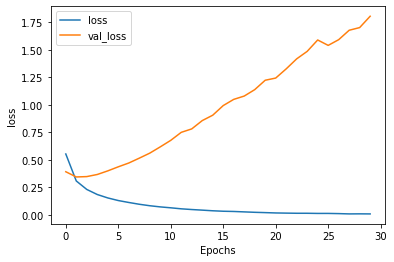

In [45]:
plot_graphs(history2, 'loss')

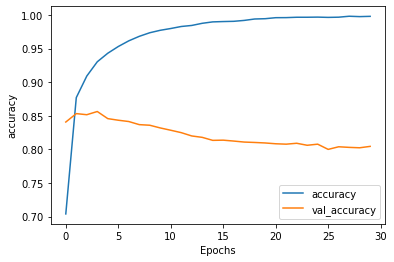

In [46]:
plot_graphs(history2, 'accuracy')

In [50]:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)

Shuffling and writing examples to C:\Users\91931\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteSAIM41\imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\Users\91931\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteSAIM41\imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\Users\91931\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteSAIM41\imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\91931\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [51]:
train_data, test_data = imdb['train'], imdb['test']

In [52]:
tokenizer = info.features['text'].encoder

In [54]:
sample_string = 'Tensorflow, from basics to advanced!'

tokenized_string = tokenizer.encode(sample_string)
print('tokenizes string: {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('original string is: {}'.format(original_string))


tokenizes string: [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 5213, 8029, 7962]
original string is: Tensorflow, from basics to advanced!


In [55]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
5213 ----> advance
8029 ----> d
7962 ----> !


In [56]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [57]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [59]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 25s 64ms/step - loss: 0.6767 - accuracy: 0.6005 - val_loss: 0.6301 - val_accuracy: 0.7592
Epoch 2/10
391/391 [==============================] - 27s 69ms/step - loss: 0.5336 - accuracy: 0.7990 - val_loss: 0.4705 - val_accuracy: 0.8143
Epoch 3/10
391/391 [==============================] - 32s 81ms/step - loss: 0.3897 - accuracy: 0.8646 - val_loss: 0.3748 - val_accuracy: 0.8638
Epoch 4/10
391/391 [==============================] - 32s 82ms/step - loss: 0.3146 - accuracy: 0.8914 - val_loss: 0.3357 - val_accuracy: 0.87240s - loss: 0.3150 - accu
Epoch 5/10
391/391 [==============================] - 34s 86ms/step - loss: 0.2736 - accuracy: 0.9040 - val_loss: 0.3168 - val_accuracy: 0.8779
Epoch 6/10
391/391 [==============================] - 35s 88ms/step - loss: 0.2463 - accuracy: 0.9134 - val_loss: 0.3137 - val_accuracy: 0.8737
Epoch 7/10
391/391 [==============================] - 33s 85ms/step - loss: 0.2248 - accuracy: 0.9202 - val_loss

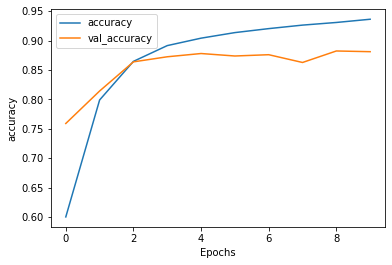

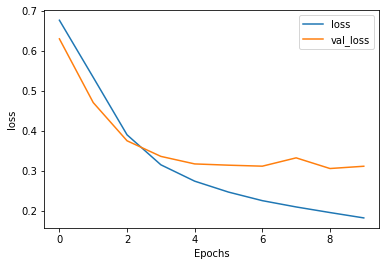

In [60]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [61]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs_3.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_3.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)
